# Project

## Production                                                                                                                                                                 
Create a symmetric $N\times N$ random matrix, with real entries distributed according to a flat distribution $p(x)$ over the interval $[-\delta:\delta]$     

In [1]:
import numpy

def symmetric_random_matrix(N, delta):
    # Explicit method
    matrix = numpy.random.random((N, N))
    matrix -= 0.5
    matrix *= 2 * delta
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if j >= i:
                matrix[j, i] = matrix[i, j]
    return matrix

The eigenvalues will all be real, so we get the real parts                                    

In [2]:
from scipy.linalg import eig

matrix = symmetric_random_matrix(N=100, delta=1.0)
eigenvalues, eigenvectors = eig(matrix)
eigenvalues = numpy.real(eigenvalues)

# Create the data/ folder with bash
!mkdir -p data
numpy.savetxt('data/eigenvalues.txt', eigenvalues,
              header='columns: eigenvalues', delimiter='\n')

## Analysis                                                                                                                                                                   
Plot the spectrum of the matrix (i.e. the density of states) 

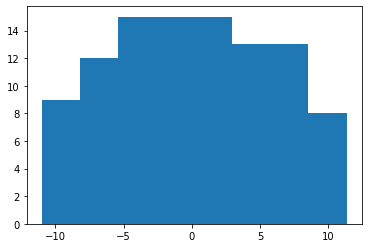

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Read back the eganvalues
eigenvalues = numpy.loadtxt('data/eigenvalues.txt', unpack=True)

# Build the histogram explictly
hist = numpy.histogram(eigenvalues)

# Create the plots/ folder with bash
!mkdir -p plots
# Let matplotlib do the job
plt.hist(eigenvalues, bins='auto')
plt.savefig('plots/spectrum.png')
plt.show()

### Case study                                                                                                                     

- Average the histogram over multiple realizations of the random matrix
- Study the role of the of the mean of the distribution $p(x)$
- Show that in the large system limit, the spectrum of symmetric random matrices obeys the Wigner semi-circle law $$ g(\lambda) = \frac{2}{\pi R^2} \sqrt{R^2 - \lambda^2}$$ where $R$ is the radius of the semi-circle          
- What is the relationship between $R$ and the variance of the distribution? 